# Data Cleaning for houses sold

In [46]:
import pandas as pd

sold_data = pd.read_csv('housesSold.csv')
sold_data.drop(columns = ['Unnamed: 0'], inplace = True)

sold_data['Price'] = sold_data['Price'].str.replace('$','')
sold_data['Price'] = sold_data['Price'].str.replace(',','')
sold_data['Square Ft'] = sold_data['Square Ft'].str.replace(',', '')
sold_data['Lot Size'] = sold_data['Lot Size'].str.replace(' Sq. Ft.','')
sold_data['Lot Size'] = sold_data['Lot Size'].str.replace(',','')
sold_data.drop(sold_data[sold_data['Type'] != 'Single Family Residential'].index, inplace = True)

In [47]:
#getting rid of missing value entries

df_filtered = sold_data[sold_data['Lot Size'] != '—']
df_filtered = df_filtered[df_filtered['Stories'] != '—']
df_filtered = df_filtered[df_filtered['Square Ft'] != '—']
df_filtered = df_filtered[df_filtered['Beds'] != '—']

df_filtered.head()

,Beds,Baths,Square Ft,Type,Year Built,Lot Size,Stories,Address,Price
0,3,2.0,1727,Single Family Residential,1953,5616,1,"1109 Woodside Rd, Berkeley, CA 94708",1462204
1,3,1.0,1425,Single Family Residential,1889,3300,1.5,"2112 6Th St, Berkeley, CA 94710",1021963
2,4,2.0,1880,Single Family Residential,1927,4365,2,"308 Vassar Ave, Kensington, CA 94708",1605499
5,3,1.0,1006,Single Family Residential,1944,5054,1,"1518 Parker St, Berkeley, CA 94703",1056887
6,2,2.0,1848,Single Family Residential,1941,6240,1,"2912 Russell St, Berkeley, CA 94705",1991223


In [48]:
#some listings are in acres so we need to standardize
def standardize_lot(string):
    if 'Acres' in string:
        output = string[:len(string)-6]
        output = float(output)
        output *= 43560
        output = int(output)
    else:
        output = int(string)
    return output

In [49]:
df_filtered['Lot Size'] = df_filtered['Lot Size'].apply(standardize_lot)

df_filtered['Price'] = df_filtered['Price'].astype(float)
df_filtered['Beds'] = df_filtered['Beds'].astype(float)
df_filtered['Baths'] = df_filtered['Baths'].astype(float)
df_filtered['Year Built'] = df_filtered['Year Built'].astype(float)
df_filtered['Square Ft'] = df_filtered['Square Ft'].astype(float)
df_filtered['Stories'] = df_filtered['Stories'].astype(float)

# Data Cleaning for houses currently listed for sale

In [50]:
lst_data = pd.read_csv('forSale.csv')
lst_data.drop(columns = ['Unnamed: 0'], inplace = True)

lst_data['Price'] = lst_data['Price'].str.replace('$','')
lst_data['Price'] = lst_data['Price'].str.replace(',','')
lst_data['Square Ft'] = lst_data['Square Ft'].str.replace(',', '')
lst_data['Lot Size'] = lst_data['Lot Size'].str.replace(' Sq. Ft.','')
lst_data['Lot Size'] = lst_data['Lot Size'].str.replace(',','')
lst_data.drop(lst_data[lst_data['Type'] != 'Single Family Residential'].index, inplace = True)

In [51]:
for_sale = lst_data[lst_data['Lot Size'] != '—']
for_sale = for_sale[for_sale['Stories'] != '—']
for_sale = for_sale[for_sale['Square Ft'] != '—']
for_sale = for_sale[for_sale['Beds'] != '—']

In [52]:
for_sale['Lot Size'] = for_sale['Lot Size'].apply(standardize_lot)

for_sale['Price'] = for_sale['Price'].astype(float)
for_sale['Beds'] = for_sale['Beds'].astype(float)
for_sale['Baths'] = for_sale['Baths'].astype(float)
for_sale['Year Built'] = for_sale['Year Built'].astype(float)
for_sale['Square Ft'] = for_sale['Square Ft'].astype(float)
for_sale['Stories'] = for_sale['Stories'].astype(float)

In [53]:
for_sale.describe

<bound method NDFrame.describe of     Beds  Baths  Square Ft                       Type  Year Built  Lot Size  \
4    4.0    2.0     1862.0  Single Family Residential      1910.0      4550   
6    3.0    2.0     2630.0  Single Family Residential      2002.0      1939   
10   3.0    2.0     1259.0  Single Family Residential      1930.0      5400   
11   2.0    2.0     1023.0  Single Family Residential      1919.0      3334   
13   6.0    3.5     2654.0  Single Family Residential      1927.0      3700   
14   4.0    4.0     3569.0  Single Family Residential      1995.0      6552   
17   3.0    2.0     1168.0  Single Family Residential      1905.0      4800   
18   3.0    3.0     2773.0  Single Family Residential      1994.0     10672   
19   6.0    4.0     4217.0  Single Family Residential      2001.0      8117   
20   2.0    1.0      834.0  Single Family Residential      1927.0      1960   
21   2.0    1.0      934.0  Single Family Residential      1921.0      3750   
22   4.0    3.0   

# Data Analysis

In [54]:
import matplotlib.pyplot as plt

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#use these variables to try and predict price
predictors = df_filtered[['Square Ft', 'Beds', 'Baths', 'Year Built', 'Lot Size', 'Stories']]
target = df_filtered[['Price']]

In [56]:
#split our data with 40% reserved for testing model
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = .40, random_state = 21)

In [57]:
#create linear regression model with training data
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [58]:
y_pred = lr.predict(X_test) #use model to predict on testing set

predicted_df = pd.DataFrame(y_test) #price listings of actual prices sold
predicted_df['Predicted'] = y_pred #prices that we predicted

predicted_df['Dif'] = (predicted_df['Price'] - predicted_df['Predicted']).astype(int) #compare difference in prices
predicted_df['Percent'] = (predicted_df['Dif'] / predicted_df['Price']) #find percentage
predicted_df

,Price,Predicted,Dif,Percent
185,1912500.0,1.277033e+06,635467,0.332270
278,1490000.0,1.181101e+06,308899,0.207315
126,1200000.0,1.158006e+06,41993,0.034994
241,1055000.0,1.442706e+06,-387705,-0.367493
162,1160000.0,1.462210e+06,-302210,-0.260526
...,...,...,...,...
206,2105529.0,2.222294e+06,-116764,-0.055456
212,1684100.0,1.496117e+06,187983,0.111622
141,1560000.0,1.295102e+06,264898,0.169806
230,1375000.0,1.380235e+06,-5234,-0.003807


In [66]:
print(predicted_df['Percent'].sum()) #negative number means we tend to under estimate price

result = predicted_df['Percent'].abs()
result.sum()/result.shape[0] #our model is off on average 20%

-2.6534877636226466


0.20082997966938226

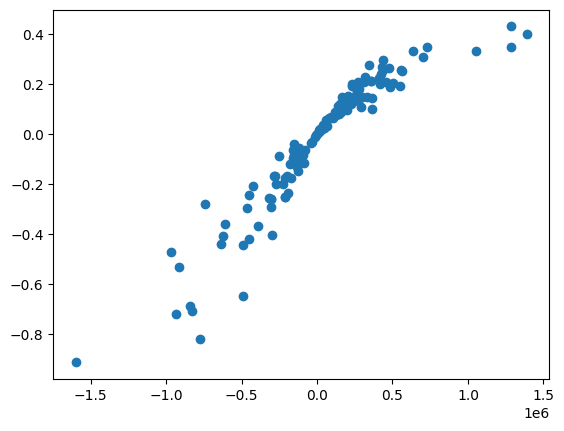

In [60]:
plt.scatter(predicted_df['Dif'], predicted_df['Percent'])
plt.show()

# Analysis for houses currently listed for sale

In [61]:
sale_predictors = for_sale[['Square Ft', 'Beds', 'Baths', 'Year Built', 'Lot Size', 'Stories']]
sale_target = for_sale[['Price']]
X_train_sale, X_test_sale, y_train_sale, y_test_sale = train_test_split(sale_predictors, sale_target, test_size = 46, random_state = 21) #use all data for test size

In [62]:
y_pred_sale = lr.predict(X_test_sale) #use model to predict on testing set

predicted_df_sale = pd.DataFrame(y_test_sale) #price listings of actual prices sold
predicted_df_sale['Predicted'] = y_pred_sale #prices that we predicted

predicted_df_sale['Dif'] = (predicted_df_sale['Price'] - predicted_df_sale['Predicted']).astype(int)
predicted_df_sale['Percent'] = (predicted_df_sale['Dif'] / predicted_df_sale['Price'])
predicted_df_sale.head()

,Price,Predicted,Dif,Percent
30,1499000.0,1.543483e+06,-44482,-0.029674
58,1395000.0,1.633672e+06,-238671,-0.171090
44,898000.0,1.212287e+06,-314287,-0.349986
25,1649500.0,1.650721e+06,-1221,-0.000740
28,1699900.0,1.839458e+06,-139558,-0.082098


In [64]:
print(predicted_df_sale['Percent'].sum()) #again we under estimate prices

result = predicted_df_sale['Percent'].abs()
avg_percent_dif = result.sum()/result.shape[0]
print(avg_percent_dif) #off on average around 22%, keep in mind these houses havent sold yet so our model might indicate that these houses can sell for different values


-8.718050305798227
0.21979987200753973


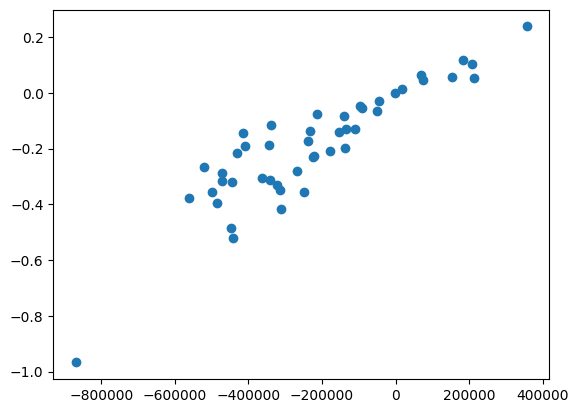

In [ ]:
#plot shows our under estimation of prices, could be due to inflation?
plt.scatter(predicted_df_sale['Dif'], predicted_df_sale['Percent'])
plt.show()
